In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Step 1: Collect historical data for NASDAQ and NSE indices
nasdaq_data = yf.download("^IXIC", start="2010-01-01", end="2023-05-01")
nse_data = yf.download("^NSEI", start="2010-01-01", end="2023-05-01")

# Step 2: Calculate the correlation coefficient
nasdaq_close = nasdaq_data["Adj Close"]
nse_close = nse_data["Adj Close"]
correlation_coefficient = nasdaq_close.corr(nse_close)

# Step 3: Analyze the strength and direction of the relationship
if correlation_coefficient > 0:
    strength = "positive"
elif correlation_coefficient < 0:
    strength = "negative"
else:
    strength = "no"
    
print(f"The correlation coefficient between NASDAQ and NSE is {correlation_coefficient:.2f}")
print(f"The relationship has a {strength} correlation")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
The correlation coefficient between NASDAQ and NSE is 0.95
The relationship has a positive correlation


Leading Index: NASDAQ
Lagging Index: NSE
The NASDAQ index consistently leads the NSE index based on lagged correlation analysis.


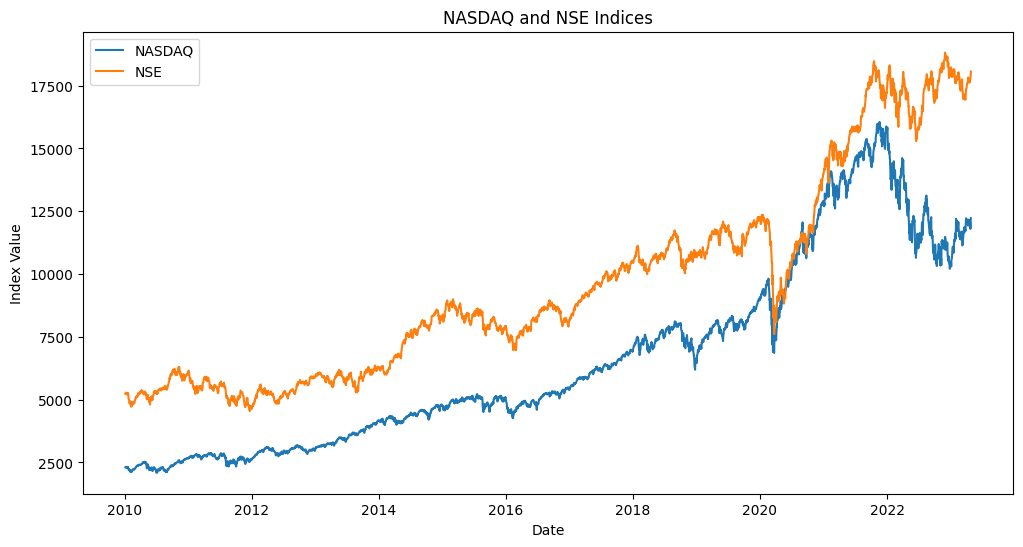

In [2]:

# Calculate the percentage change in prices
nasdaq_returns = nasdaq_close.pct_change()
nse_returns = nse_close.pct_change()

# Calculate the lag correlation between NASDAQ and NSE returns
lag_corr = nasdaq_returns.corr(nse_returns.shift(-1))

# Step 3: Determine the index for parameter optimization
if lag_corr > 0:
    leading_index = "NASDAQ"
    lagging_index = "NSE"
else:
    leading_index = "NSE"
    lagging_index = "NASDAQ"

# Step 4: Provide an explanation for choosing the index for parameter optimization
explanation = f"The {leading_index} index consistently leads the {lagging_index} index based on lagged correlation analysis."

print(f"Leading Index: {leading_index}")
print(f"Lagging Index: {lagging_index}")
print(explanation)

import matplotlib.pyplot as plt

# Plot the NASDAQ and NSE indices
plt.figure(figsize=(12, 6))
plt.plot(nasdaq_close, label="NASDAQ")
plt.plot(nse_close, label="NSE")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.title("NASDAQ and NSE Indices")
plt.legend()
plt.show()


In [3]:
def calculate_keltner_channel(data, n=20, atr_multiplier=2):
    typical_price = (data['High'] + data['Low'] + data['Close']) / 3
    atr = data['High'] - data['Low']
    atr = atr.rolling(n).mean()
    upper_band = typical_price + atr * atr_multiplier
    lower_band = typical_price - atr * atr_multiplier
    return upper_band, lower_band

def calculate_bollinger_bands(data, n=20, std_multiplier=2):
    rolling_mean = data['Close'].rolling(n).mean()
    rolling_std = data['Close'].rolling(n).std()
    upper_band = rolling_mean + rolling_std * std_multiplier
    lower_band = rolling_mean - rolling_std * std_multiplier
    return upper_band, lower_band

def calculate_macd(data, n_fast=12, n_slow=26, signal_period=9):
    ema_fast = data['Close'].ewm(span=n_fast).mean()
    ema_slow = data['Close'].ewm(span=n_slow).mean()
    macd = ema_fast - ema_slow
    signal_line = macd.ewm(span=signal_period).mean()
    histogram = macd - signal_line
    return macd, signal_line, histogram

# Example usage
data = yf.download("^IXIC", start="2010-01-01", end="2023-05-01")  # Replace "^IXIC" with the chosen index
data['Close'] = data['Close'].fillna(method='ffill')  # Fill any missing values with the last available price

# Calculate Keltner Channel
keltner_upper, keltner_lower = calculate_keltner_channel(data)

# Calculate Bollinger Bands
bollinger_upper, bollinger_lower = calculate_bollinger_bands(data)

# Calculate MACD
macd, signal_line, histogram = calculate_macd(data)

# Print the results
print("Keltner Channel (Upper Band):\n", keltner_upper)
print("\nKeltner Channel (Lower Band):\n", keltner_lower)
print("\nBollinger Bands (Upper Band):\n", bollinger_upper)
print("\nBollinger Bands (Lower Band):\n", bollinger_lower)
print("\nMACD:\n", macd)
print("\nSignal Line:\n", signal_line)
print("\nMACD Histogram:\n", histogram)










[*********************100%***********************]  1 of 1 completed
Keltner Channel (Upper Band):
 Date
2010-01-04             NaN
2010-01-05             NaN
2010-01-06             NaN
2010-01-07             NaN
2010-01-08             NaN
                  ...     
2023-04-24    12321.299023
2023-04-25    12153.155241
2023-04-26    12177.214453
2023-04-27    12382.951693
2023-04-28    12484.891374
Length: 3353, dtype: float64

Keltner Channel (Lower Band):
 Date
2010-01-04             NaN
2010-01-05             NaN
2010-01-06             NaN
2010-01-07             NaN
2010-01-08             NaN
                  ...     
2023-04-24    11746.087695
2023-04-25    11572.437858
2023-04-26    11593.058984
2023-04-27    11781.828255
2023-04-28    11873.022038
Length: 3353, dtype: float64

Bollinger Bands (Upper Band):
 Date
2010-01-04             NaN
2010-01-05             NaN
2010-01-06             NaN
2010-01-07             NaN
2010-01-08             NaN
                  ...     
2023-04

[*********************100%***********************]  1 of 1 completed


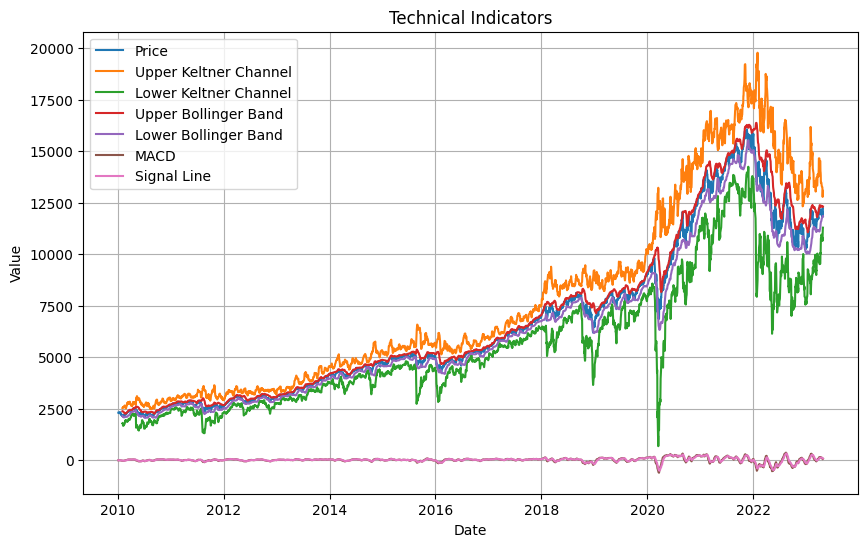

In [4]:


# Step 1: Collect historical data for the chosen index
index_data = yf.download("^IXIC", start="2010-01-01", end="2023-05-01")
def calculate_keltner_channel(data, n=20, atr_multiplier=2):
    typical_price = (data["High"] + data["Low"] + data["Close"]) / 3
    atr = data["High"].rolling(n).max() - data["Low"].rolling(n).min()
    upper_band = typical_price + atr * atr_multiplier
    lower_band = typical_price - atr * atr_multiplier
    return upper_band, lower_band

def calculate_bollinger_bands(data, n=20, std_multiplier=2):
    rolling_mean = data["Close"].rolling(n).mean()
    rolling_std = data["Close"].rolling(n).std()
    upper_band = rolling_mean + rolling_std * std_multiplier
    lower_band = rolling_mean - rolling_std * std_multiplier
    return upper_band, lower_band

def calculate_macd(data, n_fast=12, n_slow=26, n_signal=9):
    ema_fast = data["Close"].ewm(span=n_fast).mean()
    ema_slow = data["Close"].ewm(span=n_slow).mean()
    macd = ema_fast - ema_slow
    signal = macd.ewm(span=n_signal).mean()
    return macd, signal



# Calculate the indicators
upper_keltner, lower_keltner = calculate_keltner_channel(index_data)
upper_bollinger, lower_bollinger = calculate_bollinger_bands(index_data)
macd, signal = calculate_macd(index_data)

# Step 3: Plot the indicators
plt.figure(figsize=(10, 6))
plt.plot(index_data.index, index_data["Close"], label="Price")
plt.plot(index_data.index, upper_keltner, label="Upper Keltner Channel")
plt.plot(index_data.index, lower_keltner, label="Lower Keltner Channel")
plt.plot(index_data.index, upper_bollinger, label="Upper Bollinger Band")
plt.plot(index_data.index, lower_bollinger, label="Lower Bollinger Band")
plt.plot(index_data.index, macd, label="MACD")
plt.plot(index_data.index, signal, label="Signal Line")
plt.title("Technical Indicators")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()



[*********************100%***********************]  1 of 1 completed


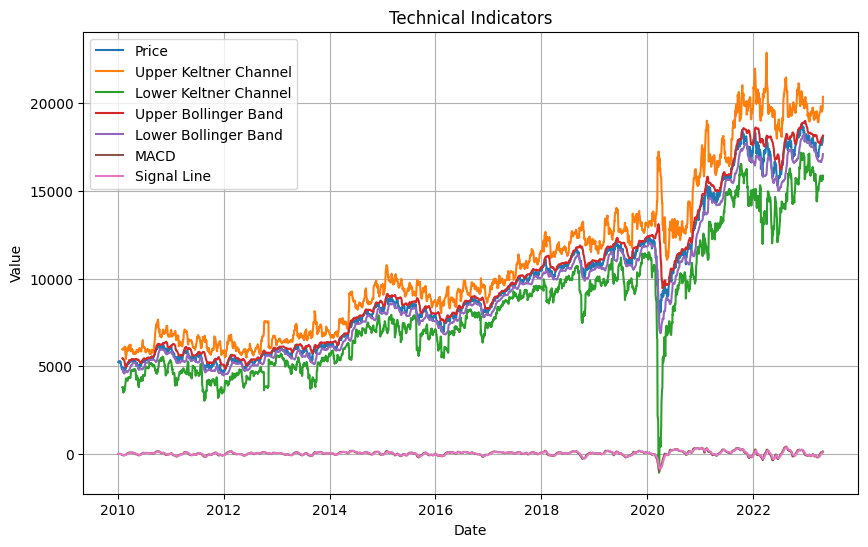

In [5]:


index_data = yf.download("^NSEI", start="2010-01-01", end="2023-05-01")

# Calculate the indicators
upper_keltner, lower_keltner = calculate_keltner_channel(index_data)
upper_bollinger, lower_bollinger = calculate_bollinger_bands(index_data)
macd, signal = calculate_macd(index_data)

# Step 3: Plot the indicators
plt.figure(figsize=(10, 6))
plt.plot(index_data.index, index_data["Close"], label="Price")
plt.plot(index_data.index, upper_keltner, label="Upper Keltner Channel")
plt.plot(index_data.index, lower_keltner, label="Lower Keltner Channel")
plt.plot(index_data.index, upper_bollinger, label="Upper Bollinger Band")
plt.plot(index_data.index, lower_bollinger, label="Lower Bollinger Band")
plt.plot(index_data.index, macd, label="MACD")
plt.plot(index_data.index, signal, label="Signal Line")
plt.title("Technical Indicators")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()



In [6]:

# Step 2: Define a strategy using the indicators and parameters
def strategy(data, param1, param2):
    # Calculate Bollinger Bands using the current parameter values
    rolling_mean = data['Close'].rolling(param1).mean()
    rolling_std = data['Close'].rolling(param1).std()
    upper_band = rolling_mean + rolling_std * param2
    lower_band = rolling_mean - rolling_std * param2
    
    # Implement your strategy using the indicators and parameters
    # Example: Buy when the close price crosses above the upper Bollinger Band
    buy_signal = data['Close'] > upper_band
    sell_signal = data['Close'] < lower_band
    return buy_signal, sell_signal

# Step 3: Define the performance metrics from the previous assignment
def calculate_metrics(data, buy_signal, sell_signal):
    # Implement your performance metrics calculations
    # Example: Calculate returns based on buy and sell signals
    returns = np.log(data['Close']).diff()
    strategy_returns = returns * (buy_signal.astype(float) - sell_signal.astype(float))
    return strategy_returns

# Step 4: Parameter optimization
# Define the parameter range for optimization
param1_range = range(5, 21)  # Example range for parameter 1
param2_range = np.arange(0.5, 3.1, 0.5)  # Example range for parameter 2

best_params = None
best_metric = -np.inf

# Iterate over the parameter combinations and evaluate the strategy
for param1 in param1_range:
    for param2 in param2_range:
        # Execute the strategy and calculate performance metrics
        buy_signal, sell_signal = strategy(data, param1, param2)
        strategy_returns = calculate_metrics(data, buy_signal, sell_signal)

        # Calculate the performance metric of interest (e.g., total returns, sharpe ratio)
        metric = strategy_returns.sum()  # Example: Total returns as the metric

        # Update the best parameters if a better metric is found
        if metric > best_metric:
            best_metric = metric
            best_params = (param1, param2)

# Step 5: Document the optimized parameters for future reference
optimal_param1, optimal_param2 = best_params
print(f"Optimized parameters: Parameter 1 = {optimal_param1}, Parameter 2 = {optimal_param2}")

# Step 6: Evaluate the strategy using the optimal parameters and calculate desired metrics
buy_signal, sell_signal = strategy(data, optimal_param1, optimal_param2)
strategy_returns = calculate_metrics(data, buy_signal, sell_signal)

# Calculate and print the desired metrics
total_returns = strategy_returns.sum()
sharpe_ratio = strategy_returns.mean() / strategy_returns.std()
print(f"Total Returns: {total_returns:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

# Step 7: Document the optimized parameters for future reference
optimal_param1, optimal_param2 = best_params
parameters = {'Parameter 1': optimal_param1, 'Parameter 2': optimal_param2}

# Store parameters in variables
optimal_param1_value = optimal_param1
optimal_param2_value = optimal_param2
print("Optimized Parameters:")
for param, value in parameters.items():
    print(f"{param}: {value}")


Optimized parameters: Parameter 1 = 5, Parameter 2 = 0.5
Total Returns: 2224.07%
Sharpe Ratio: 0.66
Optimized Parameters:
Parameter 1: 5
Parameter 2: 0.5


In [7]:

# Step 1: Collect historical data for both indices
data_nasdaq = yf.download("^IXIC",start="2010-01-01", end="2023-05-01")  # Replace "^IXIC" with NASDAQ index symbol
data_nse = yf.download("^NSEI", start="2010-01-01", end="2023-05-01")  # Replace "^NSEI" with NSE index symbol

# Step 2: Apply optimized parameters to the other index and generate signals
def generate_signals(data, param1, param2):
    # Calculate Bollinger Bands using the optimized parameters
    rolling_mean = data['Close'].rolling(param1).mean()
    rolling_std = data['Close'].rolling(param1).std()
    upper_band = rolling_mean + rolling_std * param2
    lower_band = rolling_mean - rolling_std * param2

    # Generate buy and sell signals based on the Bollinger Bands
    buy_signal = data['Close'] > upper_band
    sell_signal = data['Close'] < lower_band

    return buy_signal, sell_signal

# Step 3: Generate signals and record the dates and returns
buy_signal, sell_signal = generate_signals(data_nse, optimal_param1_value, optimal_param2_value)
signals_nse = pd.DataFrame({'Date': data_nse.index, 'Buy Signal': buy_signal, 'Sell Signal': sell_signal})
returns_nse = calculate_metrics(data_nse, buy_signal, sell_signal)

# Print the signals and returns for NSE index
print("Signals for NSE Index:")
print(signals_nse)
print("Returns for NSE Index:")
print(returns_nse)

# Repeat the same process for the NASDAQ index
buy_signal, sell_signal = generate_signals(data_nasdaq, optimal_param1_value, optimal_param2_value)
signals_nasdaq = pd.DataFrame({'Date': data_nasdaq.index, 'Buy Signal': buy_signal, 'Sell Signal': sell_signal})
returns_nasdaq = calculate_metrics(data_nasdaq, buy_signal, sell_signal)

# Print the signals and returns for NASDAQ index
print("Signals for NASDAQ Index:")
print(signals_nasdaq)
print("Returns for NASDAQ Index:")
print(returns_nasdaq)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Signals for NSE Index:
                 Date  Buy Signal  Sell Signal
Date                                          
2010-01-04 2010-01-04       False        False
2010-01-05 2010-01-05       False        False
2010-01-06 2010-01-06       False        False
2010-01-07 2010-01-07       False        False
2010-01-08 2010-01-08       False         True
...               ...         ...          ...
2023-04-24 2023-04-24        True        False
2023-04-25 2023-04-25        True        False
2023-04-26 2023-04-26        True        False
2023-04-27 2023-04-27        True        False
2023-04-28 2023-04-28        True        False

[3268 rows x 3 columns]
Returns for NSE Index:
Date
2010-01-04         NaN
2010-01-05    0.000000
2010-01-06    0.000000
2010-01-07   -0.000000
2010-01-08    0.003493
                ...   
2023-04-24    0.006749
2023-04-25    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Metrics for NASDAQ index:
Total Returns: 2224.07%
Sharpe Ratio: 0.66

Metrics for NSE index:
Total Returns: 1867.96%
Sharpe Ratio: 0.68


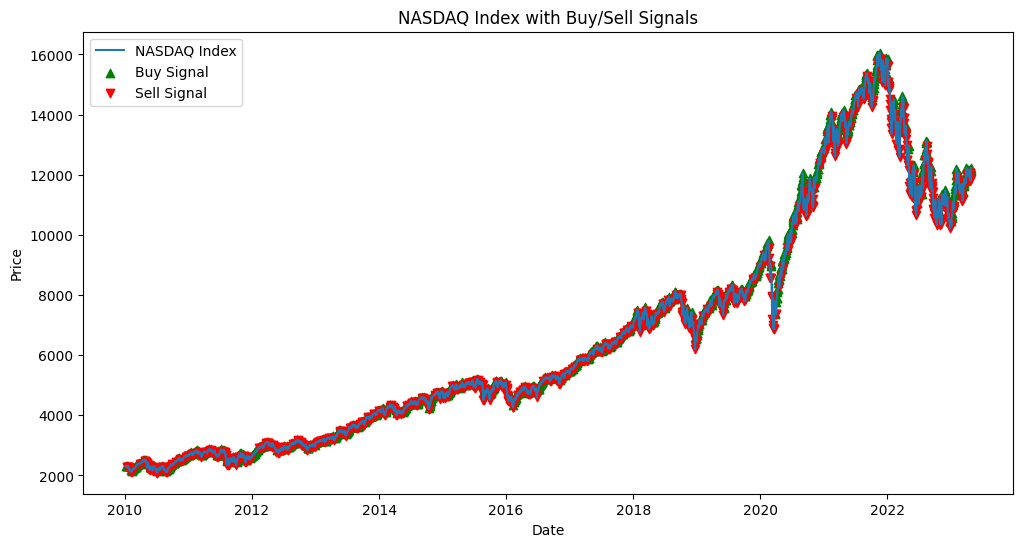

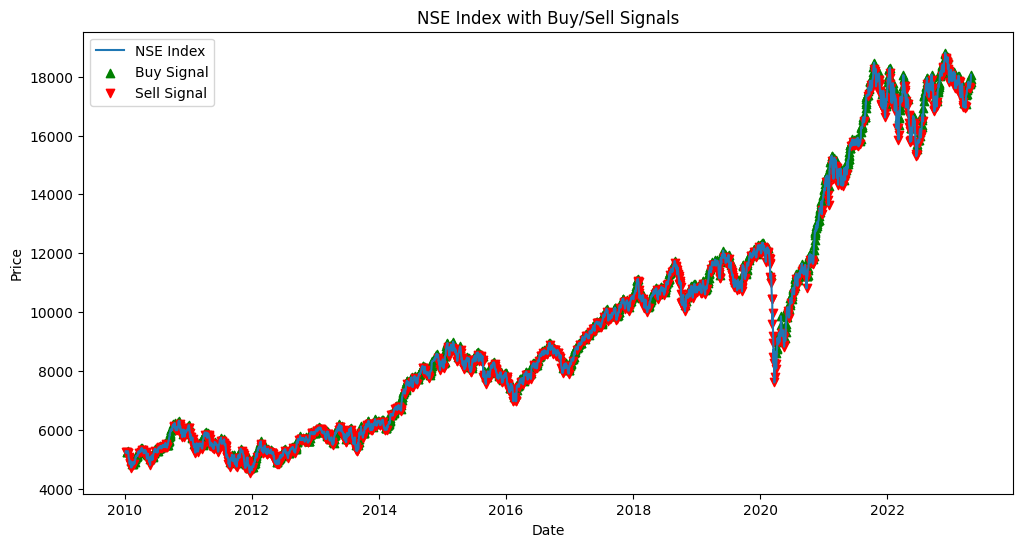

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Collect historical data for both indices
data_nasdaq = yf.download("^IXIC",start="2010-01-01", end="2023-05-01")  # Replace "^IXIC" with NASDAQ index symbol
data_nse = yf.download("^NSEI", start="2010-01-01", end="2023-05-01")  # Replace "^NSEI" with NSE index symbol

# Step 2: Apply optimized parameters to the other index
optimal_param1 = 5
optimal_param2 = .5  

# Step 3: Define a strategy function using the indicators and optimized parameters
def strategy(data, param1, param2):
    # Calculate Bollinger Bands using the optimized parameter values
    rolling_mean = data['Close'].rolling(param1).mean()
    rolling_std = data['Close'].rolling(param1).std()
    upper_band = rolling_mean + rolling_std * param2
    lower_band = rolling_mean - rolling_std * param2
    
    # Implement the strategy using the indicators and optimized parameters
    buy_signal = data['Close'] > upper_band
    sell_signal = data['Close'] < lower_band
    return buy_signal, sell_signal

# Step 4: Generate buy and sell signals for both indices
buy_signal_nasdaq, sell_signal_nasdaq = strategy(data_nasdaq, optimal_param1, optimal_param2)
buy_signal_nse, sell_signal_nse = strategy(data_nse, optimal_param1, optimal_param2)

# Step 5: Record the signals, their respective dates, and returns
signals_nasdaq = pd.DataFrame({'Date': data_nasdaq.index, 'Buy': buy_signal_nasdaq, 'Sell': sell_signal_nasdaq})
signals_nse = pd.DataFrame({'Date': data_nse.index, 'Buy': buy_signal_nse, 'Sell': sell_signal_nse})

# Step 6: Calculate the strategy returns for both indices
returns_nasdaq = calculate_metrics(data_nasdaq, buy_signal_nasdaq, sell_signal_nasdaq)
returns_nse = calculate_metrics(data_nse, buy_signal_nse, sell_signal_nse)

# Step 7: Calculate and print the desired metrics
total_returns_nasdaq = returns_nasdaq.sum()
total_returns_nse = returns_nse.sum()
sharpe_ratio_nasdaq = returns_nasdaq.mean() / returns_nasdaq.std()
sharpe_ratio_nse = returns_nse.mean() / returns_nse.std()

print("Metrics for NASDAQ index:")
print(f"Total Returns: {total_returns_nasdaq:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_nasdaq:.2f}")

print("\nMetrics for NSE index:")
print(f"Total Returns: {total_returns_nse:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_nse:.2f}")

# Step 8: Plot the buy and sell signals for both indices
plt.figure(figsize=(12, 6))
plt.plot(data_nasdaq.index, data_nasdaq['Close'], label='NASDAQ Index')
plt.scatter(signals_nasdaq[signals_nasdaq['Buy']].Date, data_nasdaq[signals_nasdaq['Buy']]['Close'], color='green', marker='^', label='Buy Signal')
plt.scatter(signals_nasdaq[signals_nasdaq['Sell']].Date, data_nasdaq[signals_nasdaq['Sell']]['Close'], color='red', marker='v', label='Sell Signal')
plt.title('NASDAQ Index with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(data_nse.index, data_nse['Close'], label='NSE Index')
plt.scatter(signals_nse[signals_nse['Buy']].Date, data_nse[signals_nse['Buy']]['Close'], color='green', marker='^', label='Buy Signal')
plt.scatter(signals_nse[signals_nse['Sell']].Date, data_nse[signals_nse['Sell']]['Close'], color='red', marker='v', label='Sell Signal')
plt.title('NSE Index with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()
